In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from random import random
# data generation
n=40
X = np.random.randint(30, 250, (n,1)) # square meters
Y = np.reshape([ceil(x) for [x] in ((X-30) / 220) * 3], (n,1))
def rumor(x):
    if x == 1:
        return 1
    r = random()
    if x == 2:
        if r<0.6: return 1
        return 2
    if r<0.6: return 2
    return 3
Y = np.reshape([rumor(y) for [y] in Y], (n,1)) # number of bathrooms
Z = 2500*X + 20000*(Y**2) # price
Z = np.reshape([z+(0.5-random())*80000 for [z] in Z], (n,1)) # price

houses with 1 bath:  16
houses with 2 baths: 15
houses with 3 baths: 9


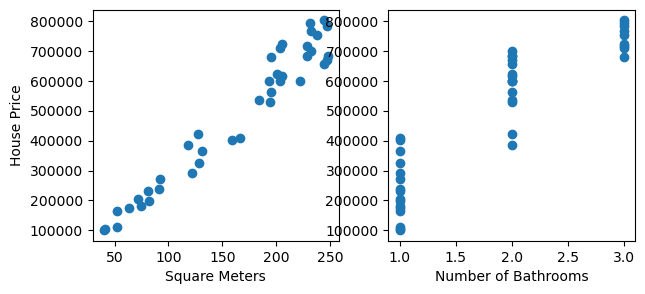

In [2]:
# data visualization
b1,b2,b3 = 0,0,0
for [y] in Y:
    if y==1: b1+=1
    if y==2: b2+=1
    if y==3: b3+=1
print("houses with 1 bath: ", b1)
print("houses with 2 baths:", b2)
print("houses with 3 baths:", b3)
fig, ax = plt.subplots(1,2, figsize=(7, 3))
ax[0].scatter(X,Z)
ax[0].set_xlabel("Square Meters")
ax[0].set_ylabel("House Price")
ax[1].scatter(Y, Z)
ax[1].set_xlabel("Number of Bathrooms")
plt.show()

In [14]:
xNormalizer = np.sqrt(np.sum(X**2))
yNormalizer = np.sqrt(np.sum(Y**2))
phi = np.concatenate((X/xNormalizer,Y/yNormalizer), axis=1)
W = np.ones((2,1))
epochs = 200000
for _ in range(epochs):
    for i in range(len(W)):
        w = np.copy(W)
        w[i] = 0
        pred = np.matmul(phi,w)
        phiColumn = np.reshape(phi[:,i], (n,1))
        p = np.sum(phiColumn*(Z - pred))
        W[i] = p
W[0] /= xNormalizer
W[1] /= yNormalizer
print(W)

[[ 2119.05200423]
 [81732.47210874]]


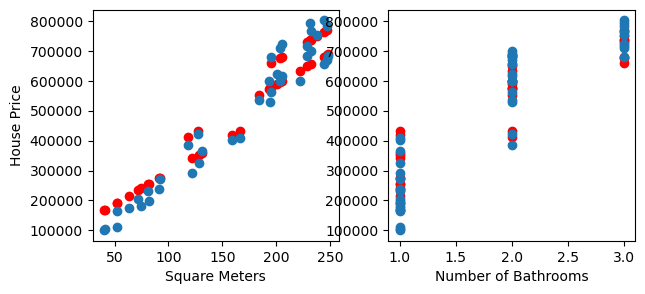

In [15]:
# prediction visualization
fig, ax = plt.subplots(1,2, figsize=(7, 3))
predX = X*W[0]
predY = Y*W[1]
pred = predX+predY
ax[0].scatter(X, pred, color="red")
ax[0].scatter(X, Z)
ax[0].set_xlabel("Square Meters")
ax[0].set_ylabel("House Price")
ax[1].scatter(Y, pred, color="red")
ax[1].scatter(Y, Z)
ax[1].set_xlabel("Number of Bathrooms")
plt.show()